In [55]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr
import scipy.stats as st


In [56]:
#Let's upload the dataset to see what data we have
data = pd.read_csv("data/measurements.csv")
print(data.shape)
data.head()

(388, 12)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [57]:
#Screening for columns with null values
data.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [58]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB
None


In [59]:
print(data.describe().T)

              count       mean        std   min    25%   50%   75%   max
speed         388.0  41.927835  13.598524  14.0  32.75  40.5  50.0  90.0
temp_outside  388.0  11.358247   6.991542  -5.0   7.00  10.0  16.0  31.0
AC            388.0   0.077320   0.267443   0.0   0.00   0.0   0.0   1.0
rain          388.0   0.123711   0.329677   0.0   0.00   0.0   0.0   1.0
sun           388.0   0.082474   0.275441   0.0   0.00   0.0   0.0   1.0


In [60]:
#Let's change the data types to numberical
#Type Conversion for Numerical Data
data['distance'] = data['distance'].str.replace(',','.').astype('float32')
data['consume'] = data['consume'].str.replace(',','.').astype('float32')
data['temp_inside'] = data['temp_inside'].str.replace(',','.').astype('float32')
data['refill liters'] = data['refill liters'].str.replace(',','.').astype('float32')
data['specials'] = data['specials'].str.lower()

In [61]:
#double check
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float32
 1   consume        388 non-null    float32
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float32
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float32
 11  refill gas     13 non-null     object 
dtypes: float32(4), int64(5), object(3)
memory usage: 30.4+ KB
None


In [62]:
print(data.describe().T)

               count       mean        std   min        25%   50%   75%  \
distance       388.0  19.652830  22.667839   1.3  11.800000  14.6  19.0   
consume        388.0   4.912370   1.033172   3.3   4.300000   4.7   5.3   
speed          388.0  41.927835  13.598524  14.0  32.750000  40.5  50.0   
temp_inside    376.0  21.929522   1.010455  19.0  21.500000  22.0  22.5   
temp_outside   388.0  11.358247   6.991542  -5.0   7.000000  10.0  16.0   
AC             388.0   0.077320   0.267443   0.0   0.000000   0.0   0.0   
rain           388.0   0.123711   0.329677   0.0   0.000000   0.0   0.0   
sun            388.0   0.082474   0.275441   0.0   0.000000   0.0   0.0   
refill liters   13.0  37.115387   8.587282  10.0  37.599998  38.0  39.0   

                      max  
distance       216.100006  
consume         12.200000  
speed           90.000000  
temp_inside     25.500000  
temp_outside    31.000000  
AC               1.000000  
rain             1.000000  
sun              1.000000

In [63]:
#Gas type
data['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

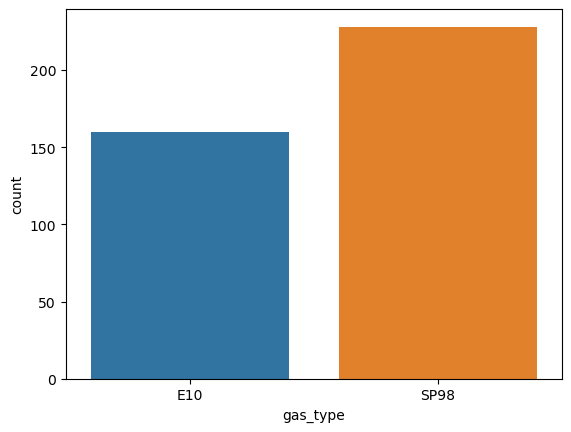

In [64]:
sns.countplot(data = data, x = "gas_type")
plt.show()


In [65]:
data['refill gas'].value_counts()

SP98    8
E10     5
Name: refill gas, dtype: int64

In [66]:
#let's see consumption per gas type
fuel_summary = data.groupby('gas_type')['consume'].mean()
fuel_summary

gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float32

In [67]:
#In general, it seems like E10 consumes more, but let's analyze further
E10 = data[data['gas_type'] == 'E10']
SP98 = data[data['gas_type'] == 'SP98']

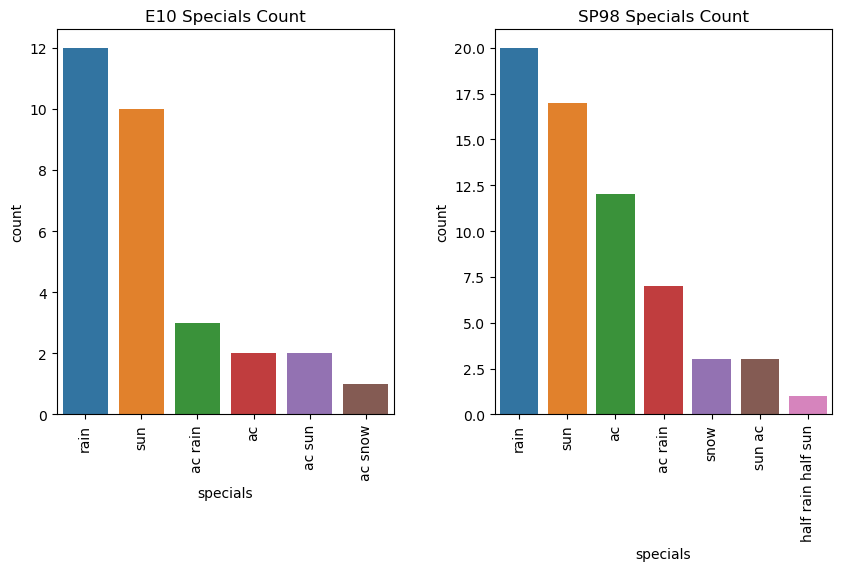

In [68]:
# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the count plot for E10 on the first subplot
counts_E10 = E10['specials'].value_counts(normalize=True).sort_values(ascending=False) * 100
sns.countplot(data=E10, x="specials", order=counts_E10.index, ax=axs[0])
axs[0].set_title('E10 Specials Count')

# Plot the count plot for SP98 on the second subplot
counts_SP98 = SP98['specials'].value_counts(normalize=True).sort_values(ascending=False) * 100
sns.countplot(data=SP98, x="specials", order=counts_SP98.index, ax=axs[1])
axs[1].set_title('SP98 Specials Count')

# Rotate the x-axis labels for readability
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


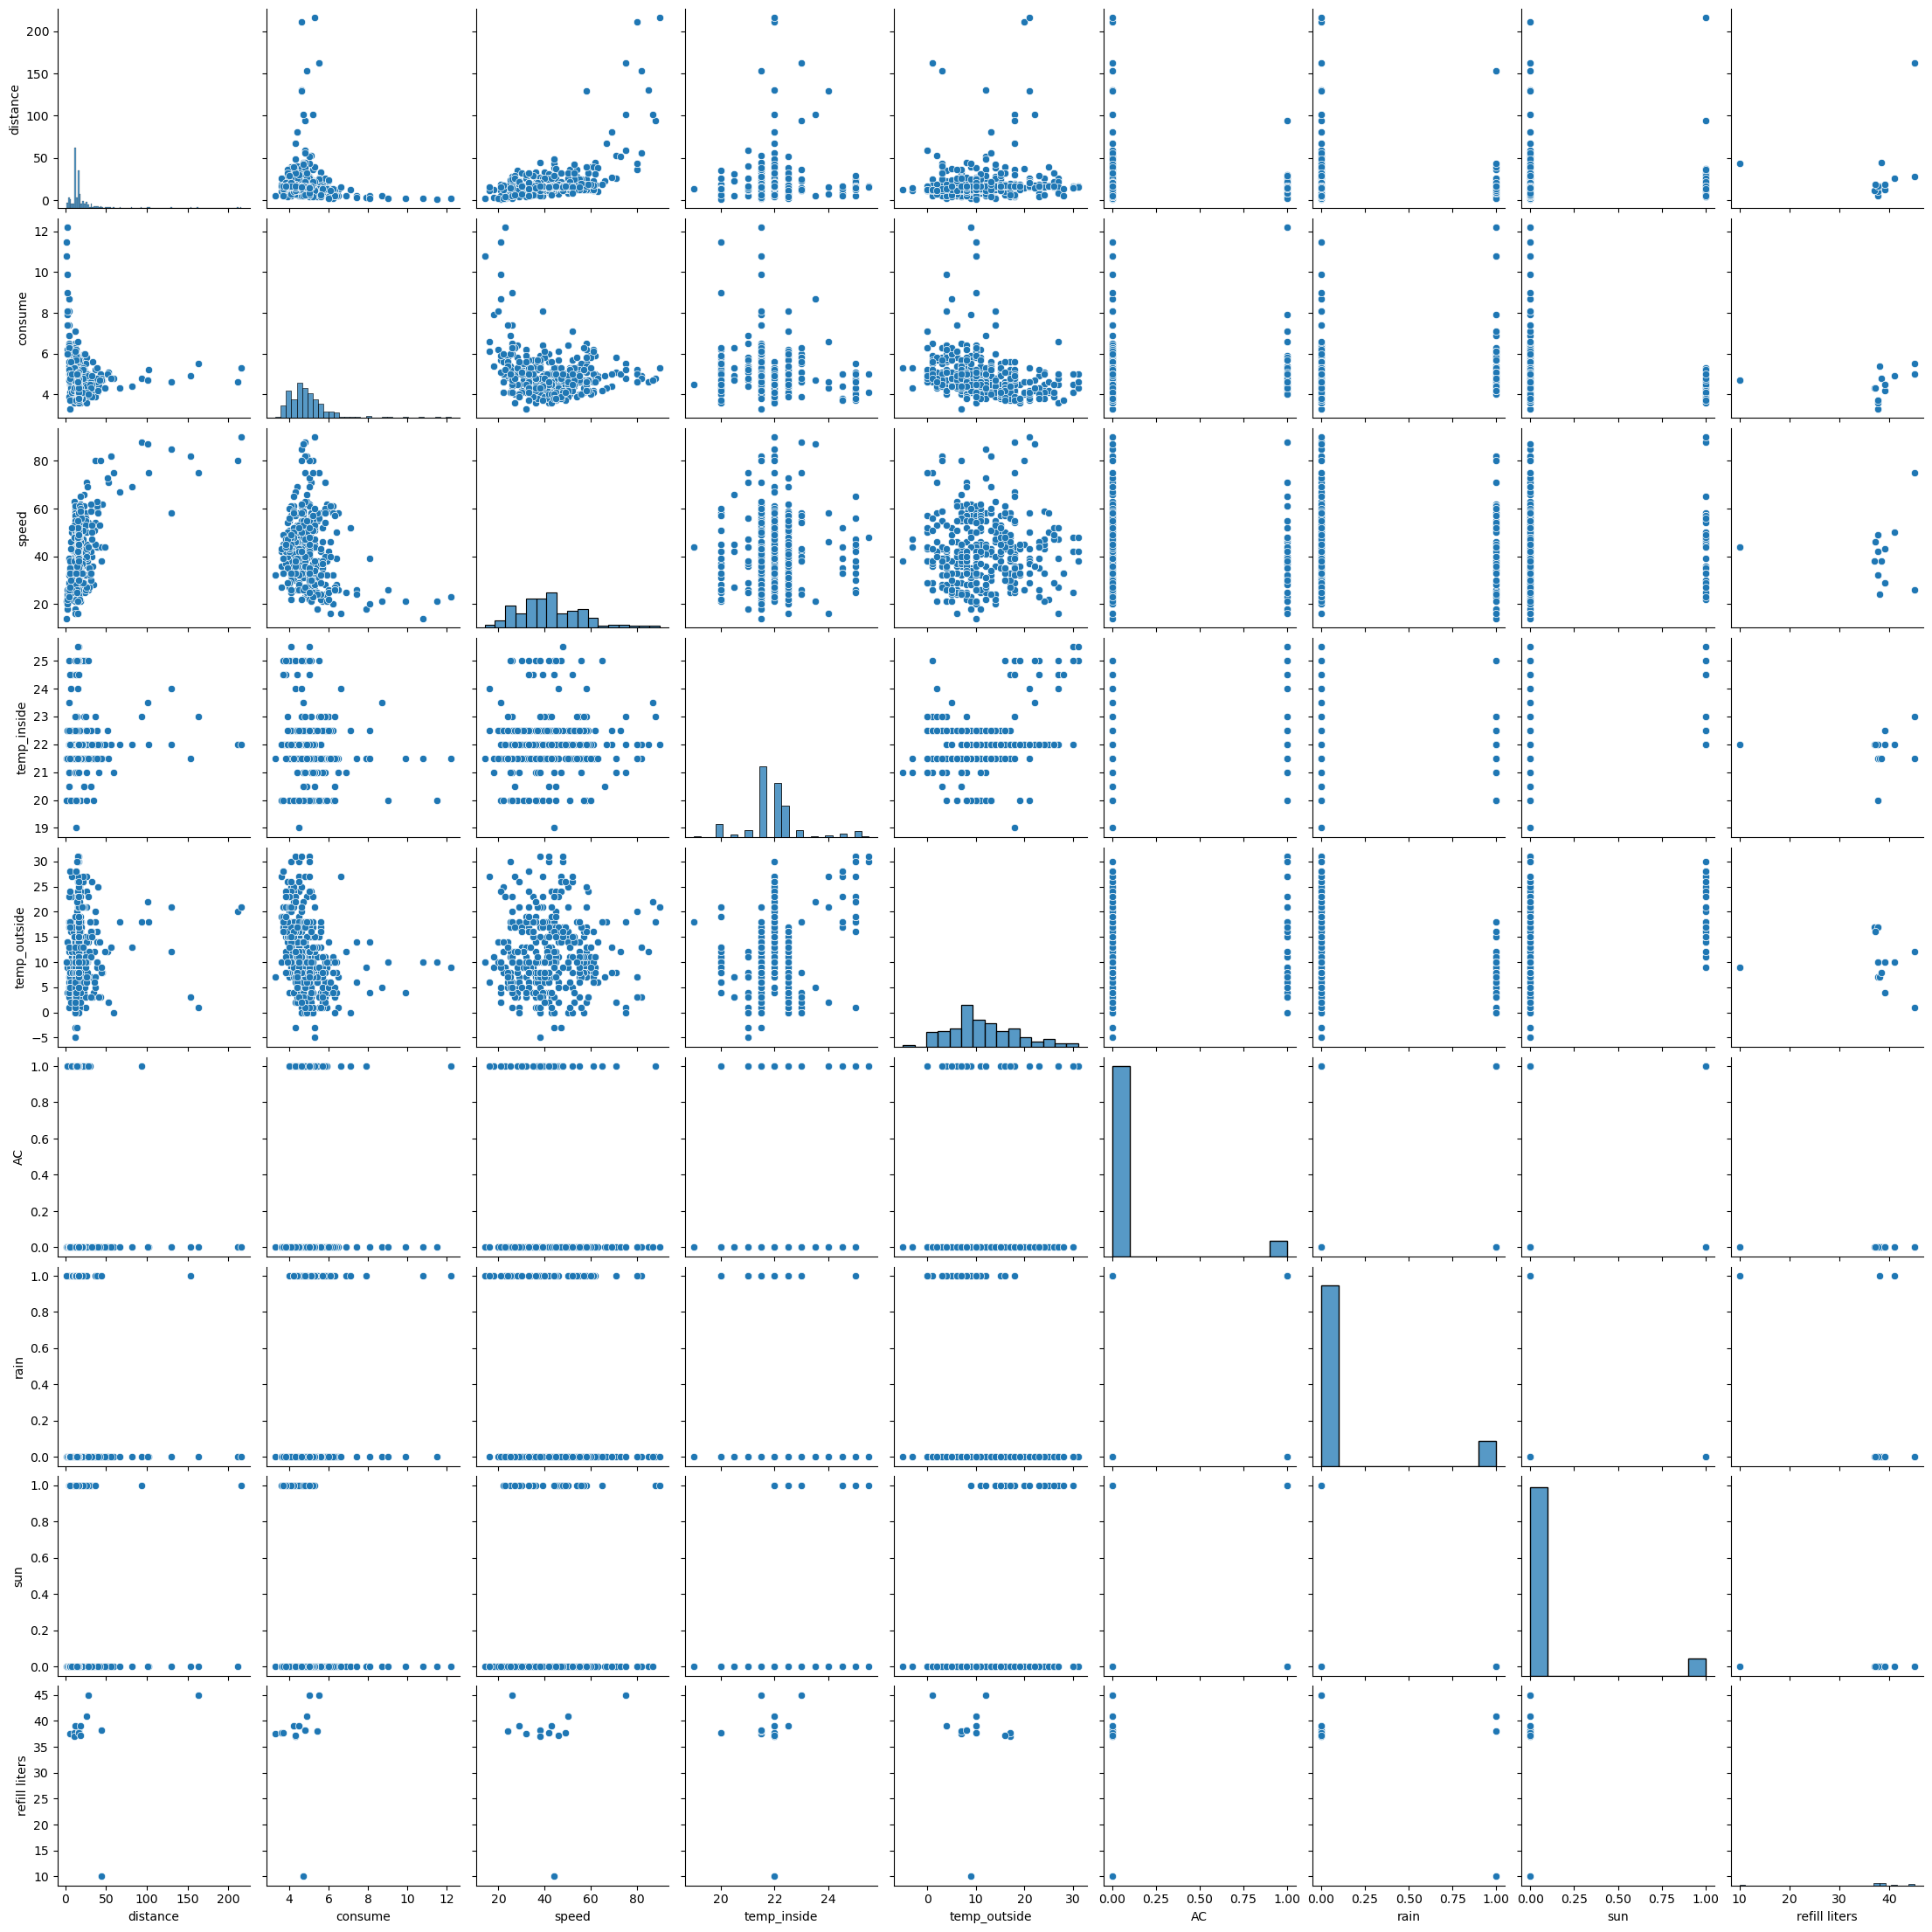

In [69]:
cols = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside','gas_type',
        'AC', 'rain', 'sun', 'refill liters','refill gas']
sns.pairplot(data[cols])
plt.show()


In [70]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

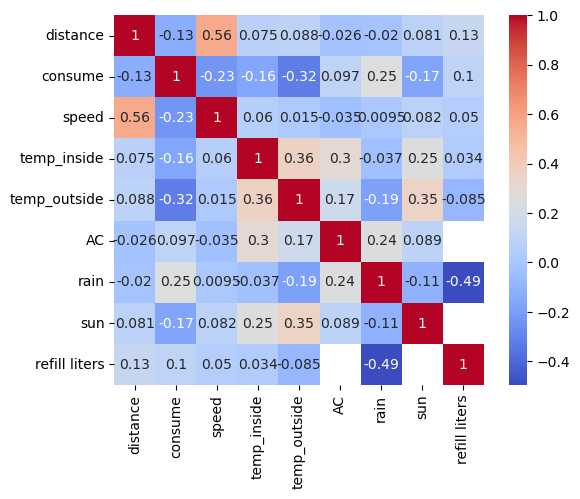

In [71]:
# Select the columns to include in the heatmap
cols = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside','gas_type',
        'AC', 'rain', 'sun', 'refill liters','refill gas']

# Calculate the correlation matrix
corr = data[cols].corr()

# Create the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)

# Show the plot
plt.show()


In [72]:
import pandas as pd
import statsmodels.formula.api as smf

# Fit a linear regression model
model = smf.ols('consume ~ speed', data=data).fit()

# Print the model summary
print(model.summary())

#he associated p-value is 5.79e-06, which is smaller than the significance level of 0.05. This indicates that the model as a whole is statistically significant.


                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     21.14
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           5.79e-06
Time:                        12:42:01   Log-Likelihood:                -552.37
No. Observations:                 388   AIC:                             1109.
Df Residuals:                     386   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6382      0.166     33.976      0.0

In [73]:
# calculate the Pearson correlation coefficient and p-value
corr, p_val = st.pearsonr(data["speed"], data["consume"])
# print the results
print("Pearson correlation coefficient: {:.3f}".format(corr))
print(p_val)

Pearson correlation coefficient: -0.228
5.7947563621027145e-06


In [74]:
corr, p_val = st.pearsonr(data["temp_outside"], data["consume"])
# print the results
print("Pearson correlation coefficient: {:.3f}".format(corr))
print(p_val)

Pearson correlation coefficient: -0.321
9.757133752558642e-11


In [75]:
#The results show that temp_outside and consume are dependant since the p-value is less than 0.05